In [1]:
# import toolkit
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import EarlyStopping

# Modelo da Amazon 

In [2]:
# import price and sentimental data
amazon_df = pd.read_csv('amazon_df.csv')
amazon_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
amazon_price_df = pd.read_csv('price/AMZN_1.csv')
amazon_df = pd.merge(amazon_df, amazon_price_df, how="outer", on=["Date", "Date"]).sort_values(by="Date", ascending=True)
print(amazon_df.shape)

In [9]:
amazon_df.drop(columns=['Date'],inplace=True)
amazon_df['retorno'] = amazon_df['Close'].pct_change()
preprocessor = ColumnTransformer([('imputer',  KNNImputer(n_neighbors=1),['Open','Low','Close', 'Volume']),('MinMax', StandardScaler(),['Open','Low','Close', 'Volume', 'Positive', 'Negative','Neutral','Sentimental Score'])], remainder='passthrough')
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [17]:
amazon_df = amazon_df.dropna().reset_index()
y_2 = amazon_df['retorno']
X_2 = amazon_df.drop(columns=['retorno'])
X_2 = my_pipeline.fit_transform(X_2)
print(y_2.shape)
print(X_2.shape)

In [21]:
X_2train = []
y_2train = []
for i in range(10, 512):
    X_2train.append(X_2[i-10:i])
    y_2train.append(y_2[i])
X_2train, y_2train = np.array(X_2train), np.array(y_2train)

### RNN DA AMAZON

In [34]:
def tanise_model():
    #normalizar o x train
    model = models.Sequential()
    model.add(layers.LSTM(100, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(100, return_sequences=False, activation='tanh'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(30, activation='linear'))
    model.compile(loss='mse', 
                  optimizer=RMSprop(learning_rate=0.03), 
                  metrics=['mae'])
    
    return model

In [37]:
modelo_2 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_2 = modelo_2.fit(X_2train, y_2train, epochs = 150, batch_size = 80, callbacks=callback)

Epoch 1/150
7/7 [==============================] - 5s 28ms/step - loss: 1.7617 - mae: 0.6765
Epoch 2/150
7/7 [==============================] - 0s 33ms/step - loss: 0.0010 - mae: 0.0248
Epoch 3/150
7/7 [==============================] - 0s 24ms/step - loss: 5.1817e-04 - mae: 0.0172
Epoch 4/150
7/7 [==============================] - 0s 27ms/step - loss: 4.0842e-04 - mae: 0.0147
Epoch 5/150
7/7 [==============================] - 0s 24ms/step - loss: 4.4821e-04 - mae: 0.0157
Epoch 6/150
7/7 [==============================] - 0s 26ms/step - loss: 4.2340e-04 - mae: 0.0151
Epoch 7/150
7/7 [==============================] - 0s 23ms/step - loss: 4.4972e-04 - mae: 0.0156
Epoch 8/150
7/7 [==============================] - 0s 24ms/step - loss: 5.2762e-04 - mae: 0.0170
Epoch 9/150
7/7 [==============================] - 0s 24ms/step - loss: 9.9505e-04 - mae: 0.0249
Epoch 10/150
7/7 [==============================] - 0s 24ms/step - loss: 6.2929e-04 - mae: 0.0196
Epoch 11/150
7/7 [===================

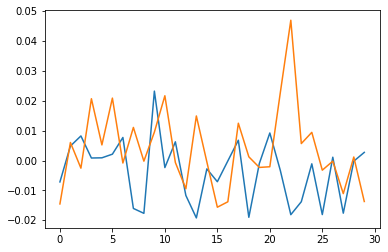

In [38]:
X_2test = []
y_2test = []
for i in range(512, len(X_2)):
    X_2test.append(X_2[i-10:i])
    y_2test.append(y_2[i])
X_2test = np.array(X_2test)
previsao_2 = modelo_2.predict(X_2test)
plt.plot(previsao_2[0])
plt.plot(y_2test)

previsao_2[0]
valores_previstos_2=array([-0.00123709, -0.00309801,  0.00097798,  0.00109722,  0.00128765,
        0.00246249, -0.00067249,  0.00336073,  0.00168929,  0.00455723,
        0.00475869, -0.00442414, -0.00167145, -0.00342615,  0.00375156,
       -0.00072974, -0.00237766, -0.00279478,  0.00104707,  0.0023252 ,
       -0.00537362, -0.00261442,  0.00412938,  0.00440552,  0.00255223,
        0.00339385, -0.00244583, -0.00498724, -0.00492568, -0.00281114],
      dtype=float32)
valores_reais_2 =[-0.014526940449806403,
 0.006027581005307203,
 -0.0025606356002577657,
 0.020669133865531597,
 0.005220349326898521,
 0.020876827345878368,
 -0.0008418264841100198,
 0.011067200346823292,
 -0.00021875366796175744,
 0.009494201556198512,
 0.02166458970792773,
 -0.0006706583687869916,
 -0.009446769888951101,
 0.014904625583759046,
 -0.000462102625423344,
 -0.015622945510225916,
 -0.013806613915329335,
 0.012474035410231954,
 0.001234069651482983,
 -0.00231428574467063,
 -0.0020900019719781726,
 0.0227237667847342,
 0.04692707191113055,
 0.005669630620418253,
 0.009422177597960824,
 -0.003234655072653414,
 -0.00021241375655556283,
 -0.0110768825099119,
 0.0011747081804083237,
 -0.013711126967133613]

### VALORES DA AMAZON

previsao_2[0] = array([-0.00716254,  0.00484408,  0.00821635,  0.00083657,  0.00090061,
        0.00211947,  0.00770755, -0.01603582, -0.01767183,  0.02321551,
       -0.00236093,  0.0062558 , -0.01169114, -0.01920567, -0.00280177,
       -0.00709364, -0.00013738,  0.00678334, -0.01899683, -0.00100743,
        0.0092101 , -0.00332262, -0.01812014, -0.01378626, -0.00110504,
       -0.01808728,  0.00110489, -0.01761812, -0.00021646,  0.00272137],
      dtype=float32)

y_2test = [-0.014526940449806403,
 0.006027581005307203,
 -0.0025606356002577657,
 0.020669133865531597,
 0.005220349326898521,
 0.020876827345878368,
 -0.0008418264841100198,
 0.011067200346823292,
 -0.00021875366796175744,
 0.009494201556198512,
 0.02166458970792773,
 -0.0006706583687869916,
 -0.009446769888951101,
 0.014904625583759046,
 -0.000462102625423344,
 -0.015622945510225916,
 -0.013806613915329335,
 0.012474035410231954,
 0.001234069651482983,
 -0.00231428574467063,
 -0.0020900019719781726,
 0.0227237667847342,
 0.04692707191113055,
 0.005669630620418253,
 0.009422177597960824,
 -0.003234655072653414,
 -0.00021241375655556283,
 -0.0110768825099119,
 0.0011747081804083237,
 -0.013711126967133613]

# Modelos para as outras

In [50]:
# import sentimental data
gme_df = pd.read_csv('gme_df.csv')
kodak_df = pd.read_csv('kodak_df.csv')
facebook_df = pd.read_csv('fb_df.csv')
apple_df = pd.read_csv('new_data/aapl_df.csv')
baba_df = pd.read_csv('new_data/baba_df.csv')
goog_df = pd.read_csv('new_data/goog_df.csv')
jnj_df = pd.read_csv('new_data/jnj_df.csv')
pfe_df = pd.read_csv('new_data/pfe_df.csv')
tsla_df = pd.read_csv('new_data/tsla_df.csv')

In [51]:
# renaming columns
gme_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
kodak_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
facebook_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
goog_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
apple_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
baba_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
jnj_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
pfe_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)
tsla_df.rename({'0':'Date', '1':'Positive', '2':'Neutral', '3':'Negative', '4':'Sentimental Score'}, axis=1, inplace=True)

# dropping columns


gme_df.drop(columns=['Unnamed: 0'], inplace=True)
kodak_df.drop(columns=['Unnamed: 0'], inplace=True)
facebook_df.drop(columns=['Unnamed: 0'], inplace=True)
apple_df.drop(columns=['Unnamed: 0'], inplace=True)
goog_df.drop(columns=['Unnamed: 0'], inplace=True)
baba_df.drop(columns=['Unnamed: 0'], inplace=True)
jnj_df.drop(columns=['Unnamed: 0'], inplace=True)
pfe_df.drop(columns=['Unnamed: 0'], inplace=True)
tsla_df.drop(columns=['Unnamed: 0'], inplace=True)

In [52]:
# import price data
gme_price_df = pd.read_csv('price/GME_1.csv')
kodak_price_df = pd.read_csv('price/KODK_1.csv')
facebook_price_df = pd.read_csv('price/FB_1.csv')
apple_price_df = pd.read_csv('price/AAPL.csv')
baba_price_df = pd.read_csv('price/BABA.csv')
goog_price_df = pd.read_csv('price/GOOG.csv')
jnj_price_df = pd.read_csv('price/JNJ.csv')
pfe_price_df = pd.read_csv('price/PFE.csv')
tsla_price_df = pd.read_csv('price/TSLA.csv')

In [53]:
gme_df = pd.merge(gme_df, gme_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
kodak_df = pd.merge(kodak_df, kodak_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
facebook_df = pd.merge(facebook_df, facebook_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
apple_df = pd.merge(apple_df, apple_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
baba_df = pd.merge(baba_df, baba_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
goog_df = pd.merge(goog_df, goog_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
jnj_df = pd.merge(jnj_df, jnj_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
pfe_df = pd.merge(pfe_df, pfe_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)
tsla_df = pd.merge(tsla_df, tsla_price_df, how="outer", on=["Date", "Date"] ).sort_values(by="Date", ascending=True)

In [54]:
facebook_df.drop(columns=['Date'],inplace=True)
kodak_df.drop(columns=['Date'],inplace=True)
gme_df.drop(columns=['Date'],inplace=True)
apple_df.drop(columns=['Date'],inplace=True)
goog_df.drop(columns=['Date'],inplace=True)
baba_df.drop(columns=['Date'],inplace=True)
jnj_df.drop(columns=['Date'],inplace=True)
pfe_df.drop(columns=['Date'],inplace=True)
tsla_df.drop(columns=['Date'],inplace=True)

In [55]:
facebook_df['retorno'] = facebook_df['Close'].pct_change()
kodak_df['retorno'] = kodak_df['Close'].pct_change()
gme_df['retorno'] = gme_df['Close'].pct_change()
apple_df['retorno'] = apple_df['Close'].pct_change()
goog_df['retorno'] = goog_df['Close'].pct_change()
baba_df['retorno'] = baba_df['Close'].pct_change()
jnj_df['retorno'] = jnj_df['Close'].pct_change()
pfe_df['retorno'] = pfe_df['Close'].pct_change()
tsla_df['retorno'] = tsla_df['Close'].pct_change()

In [56]:
apple_df = apple_df.dropna().reset_index()#1
gme_df = gme_df.dropna().reset_index() #3
kodak_df = kodak_df.dropna().reset_index() #4
facebook_df = facebook_df.dropna().reset_index()#5
goog_df = goog_df.dropna().reset_index() #6
jnj_df = jnj_df.dropna().reset_index() #7
pfe_df = pfe_df.dropna().reset_index() #8
tsla_df = tsla_df.dropna().reset_index() #9
baba_df = baba_df.dropna().reset_index() #10

In [58]:
my_pipeline1 = Pipeline(steps=[('preprocessor', preprocessor)])
my_pipeline3 = Pipeline(steps=[('preprocessor', preprocessor)])
my_pipeline4 = Pipeline(steps=[('preprocessor', preprocessor)])
my_pipeline5 = Pipeline(steps=[('preprocessor', preprocessor)])
my_pipeline6 = Pipeline(steps=[('preprocessor', preprocessor)])
my_pipeline7 = Pipeline(steps=[('preprocessor', preprocessor)])
my_pipeline8 = Pipeline(steps=[('preprocessor', preprocessor)])
my_pipeline9 = Pipeline(steps=[('preprocessor', preprocessor)])
my_pipeline10 = Pipeline(steps=[('preprocessor', preprocessor)])

In [59]:
y_1 = apple_df['retorno']
y_3 = gme_df['retorno']
y_4 = kodak_df['retorno']
y_5 = facebook_df['retorno']
y_6 = goog_df['retorno']
y_7 = jnj_df['retorno']
y_8 = pfe_df['retorno']
y_9 = tsla_df['retorno']
y_10 = baba_df['retorno']

In [60]:
X_1 = apple_df.drop(columns=['retorno'])
X_3 = gme_df.drop(columns=['retorno'])
X_4 = kodak_df.drop(columns=['retorno'])
X_5 = facebook_df.drop(columns=['retorno'])
X_6 = goog_df.drop(columns=['retorno'])
X_7 = jnj_df.drop(columns=['retorno'])
X_8 = pfe_df.drop(columns=['retorno'])
X_9 = tsla_df.drop(columns=['retorno'])
X_10 = baba_df.drop(columns=['retorno'])

In [61]:
X_1 = my_pipeline1.fit_transform(X_1)
X_3 = my_pipeline3.fit_transform(X_3)
X_4 = my_pipeline4.fit_transform(X_4)
X_5 = my_pipeline5.fit_transform(X_5)
X_6 = my_pipeline6.fit_transform(X_6)
X_7 = my_pipeline7.fit_transform(X_7)
X_8 = my_pipeline8.fit_transform(X_8)
X_9 = my_pipeline9.fit_transform(X_9)
X_10 = my_pipeline10.fit_transform(X_10)

In [62]:
X_1train = []
y_1train = []
for i in range(10, 547):
    X_1train.append(X_1[i-10:i])
    y_1train.append(y_1[i])
X_3train = []
y_3train = []
for i in range(10, 303):
    X_3train.append(X_3[i-10:i])
    y_3train.append(y_3[i])
X_4train = []
y_4train = []
for i in range(10, 75):
    X_4train.append(X_4[i-10:i])
    y_4train.append(y_4[i])
X_5train = []
y_5train = []
for i in range(10, 597):
    X_5train.append(X_5[i-10:i])
    y_5train.append(y_5[i])    
X_6train = []
y_6train = []
for i in range(10, 547):
    X_6train.append(X_6[i-10:i])
    y_6train.append(y_6[i])
X_7train = []
y_7train = []
for i in range(10, 426):
    X_7train.append(X_7[i-10:i])
    y_7train.append(y_7[i])
X_8train = []
y_8train = []
for i in range(10, 456):
    X_8train.append(X_8[i-10:i])
    y_8train.append(y_8[i])
X_9train = []
y_9train = []
for i in range(10, 547):
    X_9train.append(X_9[i-10:i])
    y_9train.append(y_9[i])
X_10train = []
y_10train = []
for i in range(10, 499):
    X_10train.append(X_10[i-10:i])
    y_10train.append(y_10[i])

In [63]:
X_1train, y_1train = np.array(X_1train), np.array(y_1train)
X_3train, y_3train = np.array(X_3train), np.array(y_3train)
X_4train, y_4train = np.array(X_4train), np.array(y_4train)
X_5train, y_5train = np.array(X_5train), np.array(y_5train)
X_6train, y_6train = np.array(X_6train), np.array(y_6train)
X_7train, y_7train = np.array(X_7train), np.array(y_7train)
X_8train, y_8train = np.array(X_8train), np.array(y_8train)
X_9train, y_9train = np.array(X_9train), np.array(y_9train)
X_10train, y_10train = np.array(X_10train), np.array(y_10train)

In [122]:
X_1test[:1]

(1, 10, 15)

Epoch 1/150
7/7 [==============================] - 7s 62ms/step - loss: 1.4778 - mae: 0.6143
Epoch 2/150
7/7 [==============================] - 0s 53ms/step - loss: 0.0019 - mae: 0.0319
Epoch 3/150
7/7 [==============================] - 0s 46ms/step - loss: 8.2993e-04 - mae: 0.0211
Epoch 4/150
7/7 [==============================] - 1s 69ms/step - loss: 6.3291e-04 - mae: 0.0180
Epoch 5/150
7/7 [==============================] - 0s 61ms/step - loss: 5.7480e-04 - mae: 0.0168
Epoch 6/150
7/7 [==============================] - 0s 64ms/step - loss: 5.7787e-04 - mae: 0.0169
Epoch 7/150
7/7 [==============================] - 0s 49ms/step - loss: 6.0446e-04 - mae: 0.0175
Epoch 8/150
7/7 [==============================] - 0s 40ms/step - loss: 5.5253e-04 - mae: 0.0163
Epoch 9/150
7/7 [==============================] - 1s 73ms/step - loss: 5.5745e-04 - mae: 0.0163
Epoch 10/150
7/7 [==============================] - 0s 59ms/step - loss: 5.6372e-04 - mae: 0.0166
Epoch 11/150
7/7 [===================

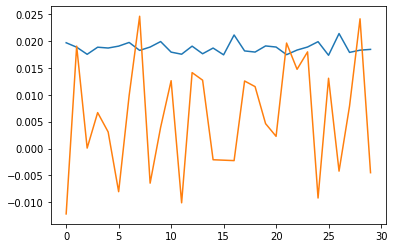

In [64]:
modelo_1 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_1 = modelo_1.fit(X_1train, y_1train, epochs = 150, batch_size = 80, callbacks=callback)
X_1test = []
y_1test = []
for i in range(547, len(X_1)):
    X_1test.append(X_1[i-10:i])
    y_1test.append(y_1[i])
X_1test = np.array(X_1test)
previsao_1 = modelo_1.predict(X_1test)
plt.plot(previsao_1[0])
plt.plot(y_1test)

y_1test = [-0.012154139395007313,
 0.019022166559055975,
 7.945139629006448e-05,
 0.0066719327061957046,
 0.003077161087438496,
 -0.00802325702118245,
 0.009832668763525065,
 0.024577913552578545,
 -0.006437740384699686,
 0.003933928642679829,
 0.012600841079968284,
 -0.010091711359132227,
 0.014103911108376721,
 0.012698357044814257,
 -0.002089855114387973,
 -0.0021689849869261923,
 -0.00224872980678148,
 0.012546000760933262,
 0.011500245331623304,
 0.0046211756352296796,
 0.002263416642797056,
 0.01959643299833358,
 0.01471847284778427,
 0.01795523852305836,
 -0.009199707848613237,
 0.013054977977341231,
 -0.004203711720665804,
 0.007889269132515198,
 0.024100484218248397,
 -0.004492109932034749]

previsao_1[0] = array([0.01965124, 0.01882823, 0.01750587, 0.01882486, 0.01867216,
       0.01902458, 0.01970763, 0.01823206, 0.01885484, 0.01987353,
       0.01791058, 0.01752255, 0.01901938, 0.01760732, 0.0186683 ,
       0.01740772, 0.02109808, 0.01813477, 0.0179213 , 0.01906012,
       0.0188552 , 0.0174364 , 0.01829455, 0.01886039, 0.01985066,
       0.01732452, 0.02136115, 0.01785775, 0.01827427, 0.01841905],
      dtype=float32)

Epoch 1/150
6/6 [==============================] - 12s 188ms/step - loss: 4.9300 - mae: 1.0975
Epoch 2/150
6/6 [==============================] - 1s 125ms/step - loss: 0.0015 - mae: 0.0297
Epoch 3/150
6/6 [==============================] - 1s 119ms/step - loss: 6.6760e-04 - mae: 0.0188
Epoch 4/150
6/6 [==============================] - 1s 86ms/step - loss: 5.9904e-04 - mae: 0.0174
Epoch 5/150
6/6 [==============================] - 1s 98ms/step - loss: 5.6866e-04 - mae: 0.0167
Epoch 6/150
6/6 [==============================] - 1s 95ms/step - loss: 5.6272e-04 - mae: 0.0165
Epoch 7/150
6/6 [==============================] - 1s 96ms/step - loss: 5.9154e-04 - mae: 0.0173
Epoch 8/150
6/6 [==============================] - 1s 98ms/step - loss: 5.9323e-04 - mae: 0.0172
Epoch 9/150
6/6 [==============================] - 1s 78ms/step - loss: 5.6144e-04 - mae: 0.0165
Epoch 10/150
6/6 [==============================] - 1s 103ms/step - loss: 5.5254e-04 - mae: 0.0164
Epoch 11/150
6/6 [==============

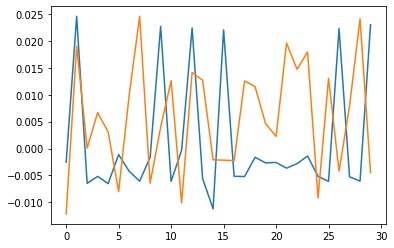

In [114]:
modelo_11 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_11 = modelo_11.fit(X_1train, y_1train, epochs = 150, batch_size = 90, callbacks=callback)
X_1test = []
y_1test = []
for i in range(547, len(X_1)):
    X_1test.append(X_1[i-10:i])
    y_1test.append(y_1[i])
X_1test = np.array(X_1test)
previsao_1 = modelo_11.predict(X_1test)
plt.plot(previsao_1[0])
plt.plot(y_1test)

In [123]:
prev = modelo_11.predict(X_1test[:1])
prev

array([[-0.00255377,  0.02456549, -0.00647956, -0.00517697, -0.00651911,
        -0.00113445, -0.00421786, -0.00607343, -0.00163472,  0.02270031,
        -0.00610039, -0.0003341 ,  0.02238471, -0.00558239, -0.0112167 ,
         0.02202737, -0.00516212, -0.00520597, -0.00162973, -0.00266963,
        -0.00259494, -0.00365008, -0.00281293, -0.00140205, -0.00517796,
        -0.00610079,  0.02230787, -0.00525193, -0.00606686,  0.02300168]],
      dtype=float32)

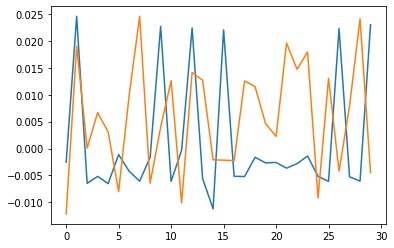

In [129]:
#prev[0]
plt.plot(prev[0])
plt.plot(y_1test)

previsao_1[0] = array([-0.00255377,  0.02456549, -0.00647956, -0.00517697, -0.00651911,
       -0.00113445, -0.00421786, -0.00607343, -0.00163472,  0.02270031,
       -0.00610039, -0.0003341 ,  0.02238471, -0.00558239, -0.0112167 ,
        0.02202737, -0.00516212, -0.00520597, -0.00162973, -0.00266963,
       -0.00259494, -0.00365008, -0.00281293, -0.00140205, -0.00517796,
       -0.00610079,  0.02230787, -0.00525193, -0.00606686,  0.02300168],
      dtype=float32)

y_1test = [-0.012154139395007313,
 0.019022166559055975,
 7.945139629006448e-05,
 0.0066719327061957046,
 0.003077161087438496,
 -0.00802325702118245,
 0.009832668763525065,
 0.024577913552578545,
 -0.006437740384699686,
 0.003933928642679829,
 0.012600841079968284,
 -0.010091711359132227,
 0.014103911108376721,
 0.012698357044814257,
 -0.002089855114387973,
 -0.0021689849869261923,
 -0.00224872980678148,
 0.012546000760933262,
 0.011500245331623304,
 0.0046211756352296796,
 0.002263416642797056,
 0.01959643299833358,
 0.01471847284778427,
 0.01795523852305836,
 -0.009199707848613237,
 0.013054977977341231,
 -0.004203711720665804,
 0.007889269132515198,
 0.024100484218248397,
 -0.004492109932034749]

Epoch 1/150
4/4 [==============================] - 10s 78ms/step - loss: 5.7524 - mae: 1.5065
Epoch 2/150
4/4 [==============================] - 0s 92ms/step - loss: 0.0644 - mae: 0.1743
Epoch 3/150
4/4 [==============================] - 0s 66ms/step - loss: 0.0286 - mae: 0.0913
Epoch 4/150
4/4 [==============================] - 0s 43ms/step - loss: 0.0278 - mae: 0.0885
Epoch 5/150
4/4 [==============================] - 0s 47ms/step - loss: 0.0281 - mae: 0.0884
Epoch 6/150
4/4 [==============================] - 0s 74ms/step - loss: 0.0282 - mae: 0.0899
Epoch 7/150
4/4 [==============================] - 0s 62ms/step - loss: 0.0280 - mae: 0.0933
Epoch 8/150
4/4 [==============================] - 0s 77ms/step - loss: 0.0278 - mae: 0.0875
Epoch 9/150
4/4 [==============================] - 0s 64ms/step - loss: 0.0283 - mae: 0.0938
Epoch 10/150
4/4 [==============================] - 0s 47ms/step - loss: 0.0282 - mae: 0.0892
Epoch 11/150
4/4 [==============================] - 0s 89ms/step - l

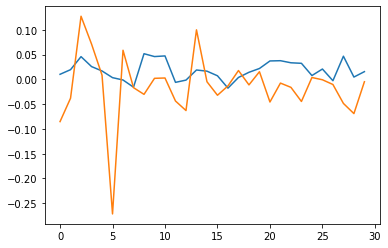

In [69]:
modelo_3 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_3 = modelo_3.fit(X_3train, y_3train, epochs = 150, batch_size = 80, callbacks=callback)
X_3test = []
y_3test = []
for i in range(303, len(X_3)):
    X_3test.append(X_3[i-30:i])
    y_3test.append(y_3[i])
X_3test = np.array(X_3test)
previsao_3 = modelo_3.predict(X_3test)
plt.plot(previsao_3[0])
plt.plot(y_3test)


y_3test = [-0.0852465910305622,
 -0.03803544916820878,
 0.12743601575359964,
 0.07139026922644653,
 0.00853332666666673,
 -0.2715824945239457,
 0.058759458499748174,
 -0.01671378274987212,
 -0.03024756772796744,
 0.0021123640449438597,
 0.0027806206988356674,
 -0.04369600239180649,
 -0.0629034307346179,
 0.09996506213417833,
 -0.004809428443087738,
 -0.032050689013416456,
 -0.013188276700939916,
 0.017851200846050297,
 -0.011113692848768952,
 0.015459000012827184,
 -0.045671047191888636,
 -0.0074867830911784505,
 -0.016121895024188815,
 -0.0445980862356995,
 0.003776360982348681,
 -0.0007838279657271796,
 -0.010354003249573918,
 -0.04856011624834866,
 -0.06908809917903036,
 -0.004772628706974924]

previsao_3[0] = array([ 0.01024822,  0.01959649,  0.04587565,  0.02584086,  0.01698051,
        0.00347573, -0.00125014, -0.01576852,  0.05179215,  0.04603721,
        0.04733384, -0.00601486, -0.00146387,  0.01892667,  0.01656038,
        0.00725199, -0.01767197,  0.00386233,  0.01429627,  0.02196985,
        0.03718561,  0.03769903,  0.03349689,  0.03241824,  0.00772092,
        0.02088304, -0.00270344,  0.04674099,  0.00469066,  0.01560879],
      dtype=float32)

Epoch 1/150
1/1 [==============================] - 9s 9s/step - loss: 0.2851 - mae: 0.2604
Epoch 2/150
1/1 [==============================] - 0s 66ms/step - loss: 4.9914 - mae: 1.8448
Epoch 3/150
1/1 [==============================] - 0s 60ms/step - loss: 0.5978 - mae: 0.5642
Epoch 4/150
1/1 [==============================] - 0s 84ms/step - loss: 0.2374 - mae: 0.2015
Epoch 5/150
1/1 [==============================] - 0s 91ms/step - loss: 0.2317 - mae: 0.1684
Epoch 6/150
1/1 [==============================] - 0s 80ms/step - loss: 0.2312 - mae: 0.1789
Epoch 7/150
1/1 [==============================] - 0s 78ms/step - loss: 0.2298 - mae: 0.1712
Epoch 8/150
1/1 [==============================] - 0s 91ms/step - loss: 0.2291 - mae: 0.1681
Epoch 9/150
1/1 [==============================] - 0s 92ms/step - loss: 0.2285 - mae: 0.1670
Epoch 10/150
1/1 [==============================] - 0s 103ms/step - loss: 0.2280 - mae: 0.1667
Epoch 11/150
1/1 [==============================] - 0s 126ms/step - lo

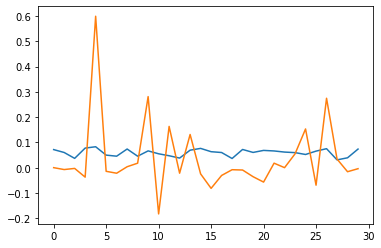

In [72]:
modelo_4 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_4 = modelo_4.fit(X_4train, y_4train, epochs = 150, batch_size = 8, callbacks=callback)
X_4test = []
y_4test = []
for i in range(75, len(X_4)):
    X_4test.append(X_4[i-30:i])
    y_4test.append(y_4[i])
X_4test = np.array(X_4test)
previsao_4 = modelo_4.predict(X_4test)
plt.plot(previsao_4[0])
plt.plot(y_4test)

y_4test = [0.0,
 -0.007485029940119681,
 -0.002971768202080338,
 -0.03738317757009346,
 0.5989375830013279,
 -0.014447884416924572,
 -0.02198952879581162,
 0.0036855036855036882,
 0.017718715393133966,
 0.2810180275715801,
 -0.1829470198675497,
 0.1631355932203391,
 -0.021857923497267784,
 0.13123359580052485,
 -0.0245649948822928,
 -0.08184679958027274,
 -0.030857142857142805,
 -0.008086253369272156,
 -0.009296148738379806,
 -0.03571428571428581,
 -0.057023643949930425,
 0.017777777777777892,
 0.0,
 0.0547752808988764,
 0.1531291611185086,
 -0.06928406466512693,
 0.27450980392156876,
 0.034052213393870545,
 -0.01602959309494434,
 -0.0040431266846361336]

previsao_4[0]=array([0.07148708, 0.06002149, 0.03677979, 0.0774437 , 0.08273148,
       0.04961709, 0.04539831, 0.0737279 , 0.04531918, 0.06636687,
       0.05486725, 0.04713621, 0.03794851, 0.06916382, 0.07623856,
       0.06317385, 0.05991261, 0.03629034, 0.07199059, 0.06026586,
       0.06826396, 0.06611221, 0.06166445, 0.0594765 , 0.05216226,
       0.06543067, 0.07508875, 0.03081424, 0.03902945, 0.07355331],
      dtype=float32)

Epoch 1/150
3/3 [==============================] - 8s 34ms/step - loss: 10.3699 - mae: 2.2327
Epoch 2/150
3/3 [==============================] - 0s 39ms/step - loss: 0.4271 - mae: 0.4601
Epoch 3/150
3/3 [==============================] - 0s 31ms/step - loss: 0.2306 - mae: 0.1615
Epoch 4/150
3/3 [==============================] - 0s 31ms/step - loss: 0.2304 - mae: 0.1603
Epoch 5/150
3/3 [==============================] - 0s 28ms/step - loss: 0.2292 - mae: 0.1556
Epoch 6/150
3/3 [==============================] - 0s 44ms/step - loss: 0.2287 - mae: 0.1552
Epoch 7/150
3/3 [==============================] - 0s 53ms/step - loss: 0.2268 - mae: 0.1606
Epoch 8/150
3/3 [==============================] - 0s 39ms/step - loss: 0.2263 - mae: 0.1654
Epoch 9/150
3/3 [==============================] - 0s 35ms/step - loss: 0.2261 - mae: 0.1675
Epoch 10/150
3/3 [==============================] - 0s 56ms/step - loss: 0.2274 - mae: 0.1590
Epoch 11/150
3/3 [==============================] - 0s 59ms/step - l

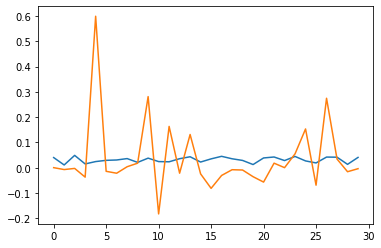

In [83]:
modelo_44 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=5)
fitted_44 = modelo_44.fit(X_4train, y_4train, epochs = 150, callbacks=callback)
X_4test = []
y_4test = []
for i in range(75, len(X_4)):
    X_4test.append(X_4[i-30:i])
    y_4test.append(y_4[i])
X_4test = np.array(X_4test)
previsao_4 = modelo_44.predict(X_4test)
plt.plot(previsao_4[0])
plt.plot(y_4test)

y_4test = [0.0,
 -0.007485029940119681,
 -0.002971768202080338,
 -0.03738317757009346,
 0.5989375830013279,
 -0.014447884416924572,
 -0.02198952879581162,
 0.0036855036855036882,
 0.017718715393133966,
 0.2810180275715801,
 -0.1829470198675497,
 0.1631355932203391,
 -0.021857923497267784,
 0.13123359580052485,
 -0.0245649948822928,
 -0.08184679958027274,
 -0.030857142857142805,
 -0.008086253369272156,
 -0.009296148738379806,
 -0.03571428571428581,
 -0.057023643949930425,
 0.017777777777777892,
 0.0,
 0.0547752808988764,
 0.1531291611185086,
 -0.06928406466512693,
 0.27450980392156876,
 0.034052213393870545,
 -0.01602959309494434,
 -0.0040431266846361336]

previsao_4[0] = array([0.03992702, 0.01066585, 0.04861103, 0.01475042, 0.02409796,
       0.02897085, 0.03038109, 0.03589891, 0.02087022, 0.03766776,
       0.02402938, 0.02325531, 0.03543616, 0.0431347 , 0.02226662,
       0.03476785, 0.04487461, 0.03514149, 0.02862427, 0.01232674,
       0.0384128 , 0.04219859, 0.02812551, 0.04441266, 0.02668302,
       0.01870102, 0.0419123 , 0.04138868, 0.01311281, 0.04055264],
      dtype=float32)

Epoch 1/150
7/7 [==============================] - 7s 66ms/step - loss: 1.8324 - mae: 0.8126
Epoch 2/150
7/7 [==============================] - 0s 66ms/step - loss: 0.0028 - mae: 0.0375
Epoch 3/150
7/7 [==============================] - 1s 96ms/step - loss: 8.7108e-04 - mae: 0.0216
Epoch 4/150
7/7 [==============================] - 1s 83ms/step - loss: 6.1752e-04 - mae: 0.0179
Epoch 5/150
7/7 [==============================] - 1s 71ms/step - loss: 5.4205e-04 - mae: 0.0165
Epoch 6/150
7/7 [==============================] - 1s 78ms/step - loss: 5.8403e-04 - mae: 0.0174
Epoch 7/150
7/7 [==============================] - 0s 63ms/step - loss: 5.8846e-04 - mae: 0.0175
Epoch 8/150
7/7 [==============================] - 0s 60ms/step - loss: 5.2640e-04 - mae: 0.0161
Epoch 9/150
7/7 [==============================] - 0s 62ms/step - loss: 5.2985e-04 - mae: 0.0161
Epoch 10/150
7/7 [==============================] - 1s 93ms/step - loss: 5.5276e-04 - mae: 0.0165
Epoch 11/150
7/7 [===================

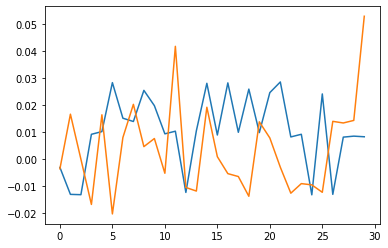

In [77]:
modelo_5 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_5 = modelo_5.fit(X_5train, y_5train, epochs = 150, batch_size = 90, callbacks=callback)
X_5test = []
y_5test = []
for i in range(597, len(X_5)):
    X_5test.append(X_5[i-30:i])
    y_5test.append(y_5[i])
X_5test = np.array(X_5test)
previsao_5 = modelo_5.predict(X_5test)
plt.plot(previsao_5[0])
plt.plot(y_5test)
#esse modelo ficou uma bosta com batch de 80, aumentei pra 90

y_5test = [-0.0036093997247325094,
 0.016633396225520736,
 -5.935505137899533e-05,
 -0.01683745508537482,
 0.016400939993996166,
 -0.02035602447606244,
 0.007977931711728115,
 0.02028345667172915,
 0.0046013538760620865,
 0.0076044423806271855,
 -0.005274194407947297,
 0.041802209359378395,
 -0.010544370267220882,
 -0.01187877979430596,
 0.019211481328990532,
 0.0008747340130337289,
 -0.005413061559186083,
 -0.00649132322266377,
 -0.01380922747608282,
 0.013800142001449078,
 0.007819162428944981,
 -0.003029810816289502,
 -0.012667190350957869,
 -0.009118930916219292,
 -0.009580175016610237,
 -0.012340227314571184,
 0.01397831082433676,
 0.013375891080303237,
 0.014325710777278733,
 0.05296280330896219]

previsao_5[0] = array([-0.00310985, -0.01310572, -0.01322447,  0.00917428,  0.01017585,
        0.02833791,  0.01514454,  0.01392379,  0.02546704,  0.01979681,
        0.00934668,  0.0103227 , -0.01238349,  0.01047053,  0.0280886 ,
        0.00890994,  0.02824516,  0.00991854,  0.02593453,  0.00979917,
        0.02463351,  0.02858644,  0.00819531,  0.00918324, -0.01327392,
        0.02414748, -0.01310122,  0.00812658,  0.00849025,  0.00825954],
      dtype=float32)

Epoch 1/150
7/7 [==============================] - 9s 49ms/step - loss: 2.8181 - mae: 0.7689
Epoch 2/150
7/7 [==============================] - 1s 97ms/step - loss: 0.0017 - mae: 0.0309
Epoch 3/150
7/7 [==============================] - 1s 132ms/step - loss: 5.7040e-04 - mae: 0.0174
Epoch 4/150
7/7 [==============================] - 1s 113ms/step - loss: 4.5895e-04 - mae: 0.0148
Epoch 5/150
7/7 [==============================] - 1s 90ms/step - loss: 4.2827e-04 - mae: 0.0139
Epoch 6/150
7/7 [==============================] - 0s 53ms/step - loss: 4.1968e-04 - mae: 0.0136
Epoch 7/150
7/7 [==============================] - 0s 67ms/step - loss: 4.1817e-04 - mae: 0.0136
Epoch 8/150
7/7 [==============================] - 0s 63ms/step - loss: 4.1878e-04 - mae: 0.0136
Epoch 9/150
7/7 [==============================] - 1s 76ms/step - loss: 4.2112e-04 - mae: 0.0137
Epoch 10/150
7/7 [==============================] - 1s 75ms/step - loss: 4.2342e-04 - mae: 0.0138
Epoch 11/150
7/7 [=================

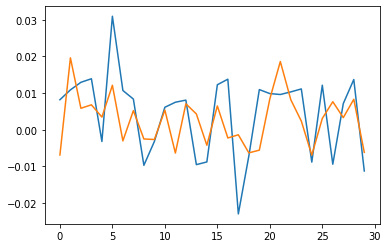

In [86]:
modelo_6 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_6 = modelo_6.fit(X_6train, y_6train, epochs = 150, batch_size = 80, callbacks=callback)
X_6test = []
y_6test = []
for i in range(547, len(X_6)):
    X_6test.append(X_6[i-30:i])
    y_6test.append(y_6[i])
X_6test = np.array(X_6test)
previsao_6 = modelo_6.predict(X_6test)
plt.plot(previsao_6[0])
plt.plot(y_6test)

y_6test = [-0.006884755861898739,
 0.019608127820065713,
 0.005844812733677651,
 0.006796187149821664,
 0.003443544455451031,
 0.012121777513152132,
 -0.0030417852627599995,
 0.005214985213736423,
 -0.002524743120212669,
 -0.0026699279964024214,
 0.005366096351608007,
 -0.006358193222924524,
 0.0070679114061258375,
 0.0043058369212893854,
 -0.0042362410115766025,
 0.006488105959559176,
 -0.0022548319780461012,
 -0.0013819480690503427,
 -0.006315975094168813,
 -0.005574597449918839,
 0.008398787167635868,
 0.01860026962624417,
 0.008172857161824032,
 0.0023619017876292947,
 -0.006922799649285105,
 0.0030771542347607372,
 0.007636548525008946,
 0.003297181146660888,
 0.008305696291767362,
 -0.00617789064488472]

previsao_6[0] = array([ 0.00817681,  0.01086706,  0.01293206,  0.01390096, -0.0032065 ,
        0.03095081,  0.01069713,  0.00835913, -0.0097069 , -0.00320741,
        0.00612518,  0.007495  ,  0.0080727 , -0.00952065, -0.00879093,
        0.01226399,  0.01377837, -0.02296616, -0.00717756,  0.01094354,
        0.00985561,  0.00960704,  0.01031661,  0.01112419, -0.00883329,
        0.01214281, -0.00940751,  0.00712678,  0.01369069, -0.01126278],
      dtype=float32)

Epoch 1/150
6/6 [==============================] - 8s 47ms/step - loss: 2.6464 - mae: 0.9621
Epoch 2/150
6/6 [==============================] - 0s 44ms/step - loss: 0.0059 - mae: 0.0573
Epoch 3/150
6/6 [==============================] - 0s 42ms/step - loss: 8.5240e-04 - mae: 0.0227
Epoch 4/150
6/6 [==============================] - 0s 40ms/step - loss: 4.0015e-04 - mae: 0.0143
Epoch 5/150
6/6 [==============================] - 0s 40ms/step - loss: 2.9519e-04 - mae: 0.0114
Epoch 6/150
6/6 [==============================] - 0s 40ms/step - loss: 2.7826e-04 - mae: 0.0109
Epoch 7/150
6/6 [==============================] - 0s 69ms/step - loss: 2.9729e-04 - mae: 0.0115
Epoch 8/150
6/6 [==============================] - 0s 50ms/step - loss: 5.0307e-04 - mae: 0.0172
Epoch 9/150
6/6 [==============================] - 0s 60ms/step - loss: 4.0030e-04 - mae: 0.0148
Epoch 10/150
6/6 [==============================] - 0s 80ms/step - loss: 5.6391e-04 - mae: 0.0186
Epoch 11/150
6/6 [===================

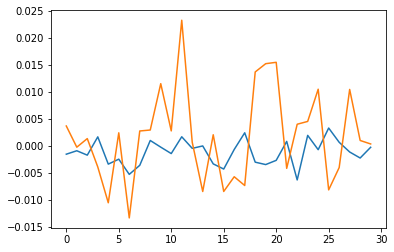

In [89]:
modelo_7 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_7 = modelo_7.fit(X_7train, y_7train, epochs = 150, batch_size = 80, callbacks=callback)
X_7test = []
y_7test = []
for i in range(426, len(X_7)):
    X_7test.append(X_7[i-30:i])
    y_7test.append(y_7[i])
X_7test = np.array(X_7test)
previsao_7 = modelo_7.predict(X_7test)
plt.plot(previsao_7[0])
plt.plot(y_7test)


y_7test = [0.0036847683963614486,
 -0.0002447120352758736,
 0.001346479108421228,
 -0.003911737590984066,
 -0.010554097121063366,
 0.0024186008660367353,
 -0.01336305165964824,
 0.002758982024039902,
 0.002938977151604183,
 0.011534423034825547,
 0.0027736497349979405,
 0.023295797094217807,
 0.0006607437120047521,
 -0.008463915559788426,
 0.0020584308739319823,
 -0.008458247457321821,
 -0.005727531497518368,
 -0.0073538240109278785,
 0.013705403625502655,
 0.015240035957970743,
 0.0154954146514108,
 -0.004172360555617427,
 0.0040102839502789145,
 0.0045307886130177,
 0.010504476394426865,
 -0.008163501231985615,
 -0.004026574579046094,
 0.010463791899868902,
 0.0009986967907777977,
 0.00035211901407761204]

previsao_7[0] = array([-1.5457906e-03, -9.0840831e-04, -1.7229787e-03,  1.6675126e-03,
       -3.3870535e-03, -2.4674479e-03, -5.2873986e-03, -3.6069043e-03,
        9.9757127e-04, -2.3732148e-04, -1.4302190e-03,  1.6859472e-03,
       -4.6191225e-04, -1.6052276e-05, -3.3413935e-03, -4.3000551e-03,
       -6.7026727e-04,  2.4245232e-03, -3.0243862e-03, -3.4702756e-03,
       -2.6874281e-03,  8.2784006e-04, -6.3195387e-03,  1.9422024e-03,
       -7.1050413e-04,  3.3057285e-03,  6.6459505e-04, -1.1377111e-03,
       -2.2535650e-03, -2.6400830e-04], dtype=float32)

Epoch 1/150
5/5 [==============================] - 8s 90ms/step - loss: 1.2301 - mae: 0.7381
Epoch 2/150
5/5 [==============================] - 0s 59ms/step - loss: 0.0051 - mae: 0.0552
Epoch 3/150
5/5 [==============================] - 0s 55ms/step - loss: 5.7298e-04 - mae: 0.0174
Epoch 4/150
5/5 [==============================] - 0s 80ms/step - loss: 3.0201e-04 - mae: 0.0116
Epoch 5/150
5/5 [==============================] - 0s 93ms/step - loss: 3.9204e-04 - mae: 0.0142
Epoch 6/150
5/5 [==============================] - 0s 83ms/step - loss: 0.0012 - mae: 0.0300
Epoch 7/150
5/5 [==============================] - 0s 86ms/step - loss: 5.7867e-04 - mae: 0.0193
Epoch 8/150
5/5 [==============================] - 0s 75ms/step - loss: 7.3244e-04 - mae: 0.0224
Epoch 9/150
5/5 [==============================] - 0s 64ms/step - loss: 9.3115e-04 - mae: 0.0258
Epoch 10/150
5/5 [==============================] - 0s 75ms/step - loss: 6.6232e-04 - mae: 0.0209
Epoch 11/150
5/5 [=======================

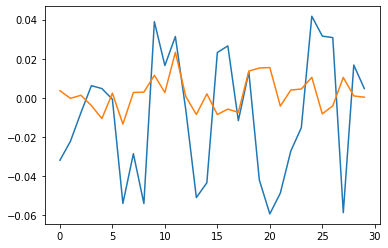

In [92]:
modelo_77 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_77 = modelo_77.fit(X_7train, y_7train, epochs = 150, batch_size = 90, callbacks=callback)
X_7test = []
y_7test = []
for i in range(426, len(X_7)):
    X_7test.append(X_7[i-30:i])
    y_7test.append(y_7[i])
X_7test = np.array(X_7test)
previsao_7 = modelo_77.predict(X_7test)
plt.plot(previsao_7[0])
plt.plot(y_7test)

y_7test= [0.0036847683963614486,
 -0.0002447120352758736,
 0.001346479108421228,
 -0.003911737590984066,
 -0.010554097121063366,
 0.0024186008660367353,
 -0.01336305165964824,
 0.002758982024039902,
 0.002938977151604183,
 0.011534423034825547,
 0.0027736497349979405,
 0.023295797094217807,
 0.0006607437120047521,
 -0.008463915559788426,
 0.0020584308739319823,
 -0.008458247457321821,
 -0.005727531497518368,
 -0.0073538240109278785,
 0.013705403625502655,
 0.015240035957970743,
 0.0154954146514108,
 -0.004172360555617427,
 0.0040102839502789145,
 0.0045307886130177,
 0.010504476394426865,
 -0.008163501231985615,
 -0.004026574579046094,
 0.010463791899868902,
 0.0009986967907777977,
 0.00035211901407761204]

previsao_7[0] = array([-0.03184004, -0.02218375, -0.00757467,  0.00626785,  0.00475197,
       -0.00069413, -0.05385898, -0.0285108 , -0.05391635,  0.03891561,
        0.01653235,  0.03133688, -0.00635535, -0.05086723, -0.04332414,
        0.02317951,  0.02654631, -0.01160949,  0.01326451, -0.04190137,
       -0.05923082, -0.0486085 , -0.0271295 , -0.01523656,  0.04168781,
        0.03155952,  0.03077025, -0.05857159,  0.01677458,  0.0047802 ],
      dtype=float32)

Epoch 1/150
6/6 [==============================] - 7s 72ms/step - loss: 4.1150 - mae: 1.2160
Epoch 2/150
6/6 [==============================] - 0s 77ms/step - loss: 0.0028 - mae: 0.0417
Epoch 3/150
6/6 [==============================] - 0s 80ms/step - loss: 0.0012 - mae: 0.0268
Epoch 4/150
6/6 [==============================] - 1s 112ms/step - loss: 6.9008e-04 - mae: 0.0202
Epoch 5/150
6/6 [==============================] - 0s 70ms/step - loss: 4.6765e-04 - mae: 0.0159
Epoch 6/150
6/6 [==============================] - 0s 52ms/step - loss: 4.8553e-04 - mae: 0.0161
Epoch 7/150
6/6 [==============================] - 0s 48ms/step - loss: 6.2663e-04 - mae: 0.0187
Epoch 8/150
6/6 [==============================] - 1s 90ms/step - loss: 4.2624e-04 - mae: 0.0148
Epoch 9/150
6/6 [==============================] - 0s 52ms/step - loss: 0.0011 - mae: 0.0252
Epoch 10/150
6/6 [==============================] - 0s 51ms/step - loss: 7.2316e-04 - mae: 0.0208
Epoch 11/150
6/6 [==========================

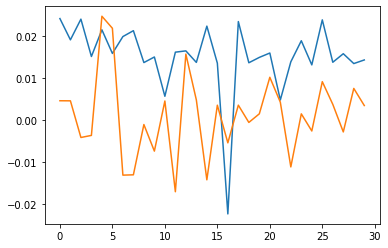

In [96]:
modelo_8 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_8 = modelo_8.fit(X_8train, y_8train, epochs = 150, batch_size = 80, callbacks=callback)
X_8test = []
y_8test = []
for i in range(456, len(X_8)):
    X_8test.append(X_8[i-30:i])
    y_8test.append(y_8[i])
X_8test = np.array(X_8test)
previsao_8 = modelo_8.predict(X_8test)
plt.plot(previsao_8[0])
plt.plot(y_8test)


y_8test = [0.0046403789875584245,
 0.004618945330701063,
 -0.004086841409350783,
 -0.003590746302096992,
 0.024710500305666905,
 0.02185377799229271,
 -0.013028485135715306,
 -0.0129514430386386,
 -0.0010093594360138791,
 -0.007325105188421888,
 0.004580160525958332,
 -0.016970571851920524,
 0.01571751543595923,
 0.004819950538605955,
 -0.014137878431253248,
 0.003585131687161791,
 -0.005358486650457017,
 0.0035915698125328355,
 -0.0005112591592475457,
 0.0015345620366389312,
 0.010214543601571036,
 0.004297223534984074,
 -0.011074720155514473,
 0.0015270439601855479,
 -0.0025412573824329376,
 0.009171990072651237,
 0.0037868646521161953,
 -0.0027665191221782903,
 0.0075661847544883365,
 0.003504365130784004]

previsao_8[0] = array([ 0.02415848,  0.01910952,  0.0240215 ,  0.01515081,  0.02148947,
        0.01588006,  0.01988267,  0.02128012,  0.01370807,  0.01503044,
        0.00570087,  0.01617976,  0.01648379,  0.01374583,  0.02236197,
        0.0135681 , -0.0222388 ,  0.02344713,  0.01366063,  0.01493533,
        0.01597497,  0.00481252,  0.01388388,  0.01889045,  0.01315702,
        0.02385211,  0.01378084,  0.01580924,  0.01347066,  0.0143292 ],
      dtype=float32)

Epoch 1/150
7/7 [==============================] - 9s 62ms/step - loss: 1.6302 - mae: 0.6391
Epoch 2/150
7/7 [==============================] - 0s 52ms/step - loss: 0.0030 - mae: 0.0399
Epoch 3/150
7/7 [==============================] - 0s 54ms/step - loss: 0.0023 - mae: 0.0340
Epoch 4/150
7/7 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.033 - 0s 58ms/step - loss: 0.0022 - mae: 0.0324
Epoch 5/150
7/7 [==============================] - 0s 57ms/step - loss: 0.0022 - mae: 0.0321
Epoch 6/150
7/7 [==============================] - 1s 88ms/step - loss: 0.0022 - mae: 0.0322
Epoch 7/150
7/7 [==============================] - 1s 67ms/step - loss: 0.0022 - mae: 0.0329
Epoch 8/150
7/7 [==============================] - 0s 48ms/step - loss: 0.0021 - mae: 0.0320
Epoch 9/150
7/7 [==============================] - 0s 55ms/step - loss: 0.0024 - mae: 0.0357
Epoch 10/150
7/7 [==============================] - 0s 63ms/step - loss: 0.0022 - mae: 0.0323
Epoch 11/150
7/7 [=============

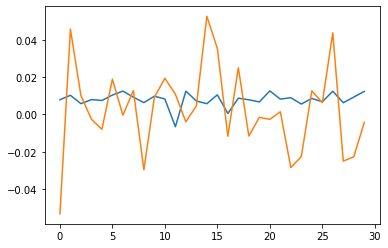

In [99]:
modelo_9 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_9 = modelo_9.fit(X_9train, y_9train, epochs = 150, batch_size = 80, callbacks=callback)
X_9test = []
y_9test = []
for i in range(547, len(X_9)):
    X_9test.append(X_9[i-30:i])
    y_9test.append(y_9[i])
X_9test = np.array(X_9test)
previsao_9 = modelo_9.predict(X_9test)
plt.plot(previsao_9[0])
plt.plot(y_9test)

y_9test = [-0.05334473909669335,
 0.045754416082577576,
 0.010149431956828714,
 -0.0025448713746097917,
 -0.007968981170302758,
 0.0189384502913843,
 -0.00037694301217883197,
 0.012789171171239788,
 -0.029675107282609026,
 0.009193155866741742,
 0.019392564622878083,
 0.010882293607423321,
 -0.0039787272440097166,
 0.004638958818893091,
 0.052684715964052664,
 0.035411303807118655,
 -0.011694289843458106,
 0.025079220248551914,
 -0.011557615977613622,
 -0.0015570796512542895,
 -0.0026188454684518137,
 0.0014456595595533361,
 -0.028457809146336777,
 -0.02263560491364547,
 0.012657989351583465,
 0.006341837079579804,
 0.043762842630010734,
 -0.025025570765932037,
 -0.022676240229138833,
 -0.004254842933820169]

previsao_9[0] = array([ 0.00790027,  0.01028031,  0.00579187,  0.00796897,  0.00748764,
        0.01042013,  0.01253095,  0.00926621,  0.00635681,  0.0098006 ,
        0.00830761, -0.00660717,  0.01251006,  0.00723205,  0.00576918,
        0.01052871,  0.0005421 ,  0.00872899,  0.00788822,  0.00672206,
        0.01264138,  0.00823502,  0.00897696,  0.00559477,  0.00858065,
        0.00680437,  0.01246773,  0.00628543,  0.00932741,  0.01236176],
      dtype=float32)

Epoch 1/150
4/4 [==============================] - 6s 78ms/step - loss: 1.9641 - mae: 0.9343
Epoch 2/150
4/4 [==============================] - 0s 79ms/step - loss: 0.0177 - mae: 0.0962
Epoch 3/150
4/4 [==============================] - 0s 68ms/step - loss: 0.0038 - mae: 0.0471
Epoch 4/150
4/4 [==============================] - 0s 79ms/step - loss: 0.0027 - mae: 0.0377
Epoch 5/150
4/4 [==============================] - 0s 96ms/step - loss: 0.0024 - mae: 0.0345
Epoch 6/150
4/4 [==============================] - 0s 96ms/step - loss: 0.0022 - mae: 0.0331
Epoch 7/150
4/4 [==============================] - 0s 73ms/step - loss: 0.0022 - mae: 0.0324
Epoch 8/150
4/4 [==============================] - 0s 69ms/step - loss: 0.0022 - mae: 0.0321
Epoch 9/150
4/4 [==============================] - 0s 79ms/step - loss: 0.0022 - mae: 0.0321
Epoch 10/150
4/4 [==============================] - 0s 73ms/step - loss: 0.0022 - mae: 0.0322
Epoch 11/150
4/4 [==============================] - 0s 66ms/step - lo

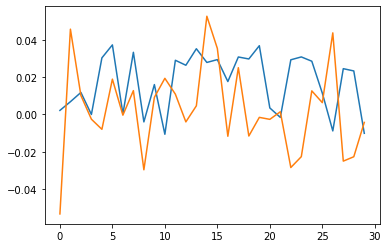

In [106]:
modelo_99 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_99 = modelo_99.fit(X_9train, y_9train, epochs = 150, batch_size = 150, callbacks=callback)
X_9test = []
y_9test = []
for i in range(547, len(X_9)):
    X_9test.append(X_9[i-30:i])
    y_9test.append(y_9[i])
X_9test = np.array(X_9test)
previsao_99 = modelo_99.predict(X_9test)
plt.plot(previsao_99[0])
plt.plot(y_9test)

y_9test = [-0.05334473909669335,
 0.045754416082577576,
 0.010149431956828714,
 -0.0025448713746097917,
 -0.007968981170302758,
 0.0189384502913843,
 -0.00037694301217883197,
 0.012789171171239788,
 -0.029675107282609026,
 0.009193155866741742,
 0.019392564622878083,
 0.010882293607423321,
 -0.0039787272440097166,
 0.004638958818893091,
 0.052684715964052664,
 0.035411303807118655,
 -0.011694289843458106,
 0.025079220248551914,
 -0.011557615977613622,
 -0.0015570796512542895,
 -0.0026188454684518137,
 0.0014456595595533361,
 -0.028457809146336777,
 -0.02263560491364547,
 0.012657989351583465,
 0.006341837079579804,
 0.043762842630010734,
 -0.025025570765932037,
 -0.022676240229138833,
 -0.004254842933820169]

previsao_99[0] = array([ 2.17196066e-03,  6.84725493e-03,  1.18091907e-02, -2.14762986e-06,
        3.03538963e-02,  3.73158455e-02,  3.27700749e-04,  3.33438404e-02,
       -3.98661010e-03,  1.60248000e-02, -1.06236748e-02,  2.90686376e-02,
        2.63961982e-02,  3.52468379e-02,  2.79011987e-02,  2.94216890e-02,
        1.76626816e-02,  3.08313537e-02,  2.97675189e-02,  3.68788987e-02,
        3.49772256e-03, -1.56814978e-03,  2.93217357e-02,  3.08640674e-02,
        2.85564531e-02,  1.14771547e-02, -8.82508419e-03,  2.45632343e-02,
        2.33450681e-02, -1.01103615e-02], dtype=float32)

Epoch 1/150
7/7 [==============================] - 20s 79ms/step - loss: 0.9814 - mae: 0.3940
Epoch 2/150
7/7 [==============================] - 1s 86ms/step - loss: 5.6629e-04 - mae: 0.0174
Epoch 3/150
7/7 [==============================] - 1s 94ms/step - loss: 5.4944e-04 - mae: 0.0171
Epoch 4/150
7/7 [==============================] - 1s 171ms/step - loss: 5.5020e-04 - mae: 0.0172
Epoch 5/150
7/7 [==============================] - 1s 104ms/step - loss: 5.5109e-04 - mae: 0.0172
Epoch 6/150
7/7 [==============================] - 1s 84ms/step - loss: 5.5016e-04 - mae: 0.0172
Epoch 7/150
7/7 [==============================] - 1s 79ms/step - loss: 5.8210e-04 - mae: 0.0178
Epoch 8/150
7/7 [==============================] - 0s 63ms/step - loss: 5.6942e-04 - mae: 0.0175
Epoch 9/150
7/7 [==============================] - 1s 133ms/step - loss: 6.2749e-04 - mae: 0.0185
Epoch 10/150
7/7 [==============================] - 0s 71ms/step - loss: 5.9763e-04 - mae: 0.0181
Epoch 11/150
7/7 [===========

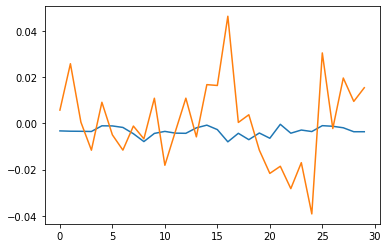

In [109]:
modelo_10 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_10 = modelo_10.fit(X_10train, y_10train, epochs = 150, batch_size = 80, callbacks=callback)
X_10test = []
y_10test = []
for i in range(499, len(X_10)):
    X_10test.append(X_10[i-30:i])
    y_10test.append(y_10[i])
X_10test = np.array(X_10test)
previsao_10 = modelo_10.predict(X_10test)
plt.plot(previsao_10[0])
plt.plot(y_10test)

y_10test = [0.005734705223283898,
 0.02579916264937232,
 0.0005011874088431956,
 -0.011612564753788024,
 0.009122793252752004,
 -0.004979191344657519,
 -0.01158372678694397,
 -0.001171948206527218,
 -0.006711446404534693,
 0.010867525318422055,
 -0.018135948576868843,
 -0.0035227565599136312,
 0.010892407316636987,
 -0.005840817123595521,
 0.016751813190606146,
 0.016382780705862743,
 0.046341216644894434,
 0.00039385705860239817,
 0.0037184746363929655,
 -0.011593460747058137,
 -0.02165095550109697,
 -0.018569410951721488,
 -0.028243370362729725,
 -0.01701326086802879,
 -0.0391826629638673,
 0.030472835386035735,
 -0.0022336928640083187,
 0.01961260883341942,
 0.009498379768699383,
 0.01541368561151768]

previsao_10[0] = array([-0.0032643 , -0.00340064, -0.00343484, -0.00351673, -0.00106154,
       -0.00111281, -0.00176956, -0.00448329, -0.00788194, -0.00435179,
       -0.00347717, -0.00423329, -0.00430852, -0.00194396, -0.00077691,
       -0.00270143, -0.00799244, -0.00430259, -0.00705862, -0.00417819,
       -0.00644314, -0.00041711, -0.00426127, -0.00289268, -0.00354385,
       -0.00099925, -0.00126433, -0.00191464, -0.00362888, -0.00362308],
      dtype=float32)

Epoch 1/150
5/5 [==============================] - 19s 94ms/step - loss: 3.9320 - mae: 1.0271
Epoch 2/150
5/5 [==============================] - 1s 106ms/step - loss: 0.0364 - mae: 0.0979
Epoch 3/150
5/5 [==============================] - 0s 83ms/step - loss: 9.0862e-04 - mae: 0.0230
Epoch 4/150
5/5 [==============================] - 1s 95ms/step - loss: 6.3971e-04 - mae: 0.0189
Epoch 5/150
5/5 [==============================] - 1s 95ms/step - loss: 5.7468e-04 - mae: 0.0176
Epoch 6/150
5/5 [==============================] - 1s 101ms/step - loss: 5.6091e-04 - mae: 0.0173
Epoch 7/150
5/5 [==============================] - 0s 89ms/step - loss: 6.1199e-04 - mae: 0.0184
Epoch 8/150
5/5 [==============================] - 0s 91ms/step - loss: 5.6560e-04 - mae: 0.0175
Epoch 9/150
5/5 [==============================] - 0s 81ms/step - loss: 8.5846e-04 - mae: 0.0221
Epoch 10/150
5/5 [==============================] - 1s 120ms/step - loss: 5.7680e-04 - mae: 0.0177
Epoch 11/150
5/5 [===============

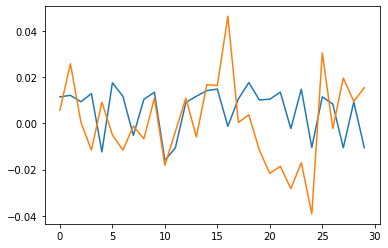

In [112]:
modelo_100 = tanise_model()
callback = EarlyStopping(monitor='loss', patience=10)
fitted_100 = modelo_100.fit(X_10train, y_10train, epochs = 150, batch_size = 100, callbacks=callback)
X_10test = []
y_10test = []
for i in range(499, len(X_10)):
    X_10test.append(X_10[i-30:i])
    y_10test.append(y_10[i])
X_10test = np.array(X_10test)
previsao_10 = modelo_100.predict(X_10test)
plt.plot(previsao_10[0])
plt.plot(y_10test)

y_10test = [0.005734705223283898,
 0.02579916264937232,
 0.0005011874088431956,
 -0.011612564753788024,
 0.009122793252752004,
 -0.004979191344657519,
 -0.01158372678694397,
 -0.001171948206527218,
 -0.006711446404534693,
 0.010867525318422055,
 -0.018135948576868843,
 -0.0035227565599136312,
 0.010892407316636987,
 -0.005840817123595521,
 0.016751813190606146,
 0.016382780705862743,
 0.046341216644894434,
 0.00039385705860239817,
 0.0037184746363929655,
 -0.011593460747058137,
 -0.02165095550109697,
 -0.018569410951721488,
 -0.028243370362729725,
 -0.01701326086802879,
 -0.0391826629638673,
 0.030472835386035735,
 -0.0022336928640083187,
 0.01961260883341942,
 0.009498379768699383,
 0.01541368561151768]

previsao_10[0] = array([ 0.01146108,  0.01212431,  0.00933303,  0.01287968, -0.01233614,
        0.01753962,  0.01171546, -0.0052315 ,  0.01037983,  0.01345675,
       -0.0160423 , -0.01059903,  0.00904969,  0.01172122,  0.0141531 ,
        0.01482998, -0.00127253,  0.01056348,  0.01765545,  0.01011742,
        0.01043198,  0.01350817, -0.0022762 ,  0.01479376, -0.0104565 ,
        0.01148494,  0.00835589, -0.01056257,  0.00921021, -0.01051065],
      dtype=float32)